### Logistic regression model

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# looking for ways to ignore tf deprecation warning

from tensorflow.compat.v1 import logging
# from tensorflow import logging
logging.set_verbosity(logging.ERROR)

# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# from tensorflow.python.util import deprecation
# deprecation._PRINT_DEPRECATION_WARNINGS = False

In [3]:
X = np.concatenate( [[-10], np.arange(1,11)] )
y = np.repeat( [0,1], [8,3] )

sgd = optimizers.SGD(lr=0.01)

model = Sequential()
model.add( Dense(1, input_dim=1, activation='sigmoid') )
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X, y, batch_size=1, epochs=200, verbose=0, shuffle=False)

[[0.6737355]]
class : 1


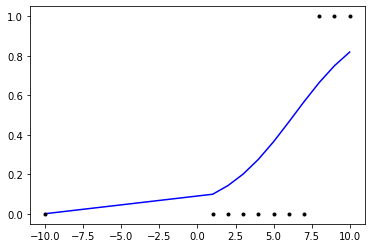

In [4]:
pred = model.predict([8.1])
pred_class = 1 if pred>=0.5 else 0  # threshold 0.5
print(pred)
print(f'class : {pred_class}')

plt.plot(X, model.predict(X), 'b', X, y, 'k.')
plt.show()

In [5]:
model = Sequential()
model.add( Dense(1, input_dim=1, activation='sigmoid') )
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X, y, batch_size=1, epochs=1000, verbose=0, shuffle=False)

[[0.7111416]]
class : 1


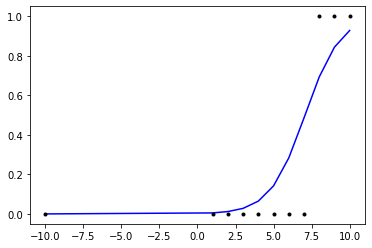

In [6]:
pred = model.predict([8.1])
pred_class = 1 if pred>=0.5 else 0  # threshold 0.5
print(pred)
print(f'class : {pred_class}')

plt.plot(X, model.predict(X), 'b', X, y, 'k.')
plt.show()

### Logistic regression model (with iris dataset)

#### 1. prepare data

In [7]:
import pandas as pd
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

iris_df = load_dataset('iris')
print(iris_df.shape)
print(iris_df.species.unique())
iris_df.head(3)

(150, 5)
['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [8]:
data = iris_df.loc[ iris_df.species.isin(['versicolor', 'virginica']) ]
X_data = data.values[:, :-1]

le = LabelEncoder()
le.fit(data['species'])
y_data = le.transform(data['species'])

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.25, 
    stratify=y_data, random_state=0)

print(X_train.shape)
print(y_train.shape)

(75, 4)
(75,)


#### 2. generate model

In [9]:
sgd = optimizers.SGD(lr=0.001)

model = Sequential()

model.add( Dense(30, input_dim=4, activation='relu') )  # hidden layer
model.add( Dense(1, activation='sigmoid') )
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=0 )

In [10]:
pred = model.predict( X_test )
pred_class = [1 if i>=0.5 else 0 for i in pred]
print(f'pred class : {le.inverse_transform(pred_class)}\n')
print(f'actual class : {le.inverse_transform(y_test)}\n')
print(f'accuracy in test set : {np.sum(pred_class == y_test)/len(y_test)}')

pred class : ['virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica']

actual class : ['virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica']

accuracy in test set : 0.48


In [11]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 7ms/step


[0.6932342052459717, 0.47999998927116394]

In [12]:
sgd = optimizers.SGD(lr=0.001)

model = Sequential()

model.add( Dense(30, input_dim=4, activation='relu') )  # hidden layer
model.add( Dense(1, activation='sigmoid') )
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=1000, verbose=0 )

In [13]:
pred = model.predict( X_test )
pred_class = [1 if i>=0.5 else 0 for i in pred]
print(f'pred class : {le.inverse_transform(pred_class)}\n')
print(f'actual class : {le.inverse_transform(y_test)}\n')
print(f'accuracy in test set : {np.sum(pred_class == y_test)/len(y_test)}')

pred class : ['virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica']

actual class : ['virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica']

accuracy in test set : 1.0


In [14]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 12ms/step


[0.21666300296783447, 1.0]